<a href="https://colab.research.google.com/github/Amy-0502/MyPython/blob/main/%E3%80%8CDeepLearning11_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#‰ΩøÁî®gdownÂ•ó‰ª∂Â≠òÂèñgoogle drive
!mkdir -p cat_dog_bird_train
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
#‰∏ãËºâÂúñÁâáËá≥VMÁ´Ø
url='https://drive.google.com/file/d/1qbxK-iKtWNZeWhyJDD6gxJis7V2nhNPQ/view?usp=sharing'
output='cat_dog_bird_train/PetImages.zip'

import gdown
gdown.download(url=url,output=output,quiet=False,fuzzy=True)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1qbxK-iKtWNZeWhyJDD6gxJis7V2nhNPQ
From (redirected): https://drive.google.com/uc?id=1qbxK-iKtWNZeWhyJDD6gxJis7V2nhNPQ&confirm=t&uuid=3c4302c2-9086-4f7b-9bd1-d7decfd9bbbd
To: /content/cat_dog_bird_train/PetImages.zip
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.75G/2.75G [00:42<00:00, 64.2MB/s]


'cat_dog_bird_train/PetImages.zip'

In [ ]:
#Ëß£Â£ìÁ∏ÆÂúñÁâáÊ™îÔºåÊúÉÁî¢ÁîüÂÖ©ÂÄãÁõÆÈåÑÂàÜÂà•ÊòØ Cat Ëàá Dog
!unzip cat_dog_bird_train/PetImages.zip -d cat_dog_bird_train

‰∏≤ÊµÅËº∏Âá∫ÂÖßÂÆπÂ∑≤Êà™Êñ∑Ëá≥ÊúÄÂæå 5000 Ë°å„ÄÇ
  inflating: cat_dog_bird_train/PetImages/dog/116.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1160.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1161.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1162.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1163.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1164.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1165.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1166.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1167.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1168.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1169.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/117.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1170.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1171.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1172.jpg  
  inflating: cat_dog_bird_train/PetImages/dog/1173.jpg  
  inflating: cat_dog_bird_train/PetImages

In [ ]:
#Âú®colabÁí∞Â¢É‰∏≠ÔºåÂÆâË£ùconda
!pip install -q condacolab

In [ ]:
import condacolab

condacolab.install()

‚è¨ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
üì¶ Installing...
üìå Adjusting configuration...
ü©π Patching environment...
‚è≤ Done in 0:00:11
üîÅ Restarting kernel...


In [ ]:
#Ê™¢Êü•condaÁâàÊú¨
!conda --version

conda 22.11.1


In [ ]:
#Ê™¢Êü•condaÂÆâË£ù‰ΩçÁΩÆ

!which conda

/usr/local/bin/conda


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Ê™¢Êü•tensorflowÁâàÊú¨
#tensorflowÁâàÊú¨ËàákerasÁâàÊú¨ÂêåÊ≠•

tf.__version__

'2.12.0'

In [ ]:
#ÂàùÂßãÂåñÂúñÁâáÂ§ßÂ∞è
image_size = (180, 180)
batch_size = 32

#image_size: ÂúñÁâáËÆÄÂèñÁöÑÂ§ßÂ∞è

#batch_size: ÊääË≥áÊñôÂàÜÊàê‰∏ÄÂ†ÜÂ†ÜÔºåÂàÜÂà•‰∏üÂÖ•È°ûÁ•ûÁ∂ìÁ∂≤Ë∑Ø‰∏≠Ë®ìÁ∑¥ÔºåËÄåÈùûÂÖ®ÈÉ®‰∏ÄËµ∑‰∏üÈÄ≤ÂéªË®ìÁ∑¥„ÄÇ
#Ëàâ‰æã‰æÜË™™Ôºå‰ªäÂ§©Êúâ100Á≠ÜË≥áÊñôÔºåÊàëË®≠ÂÆöBatch size=10Ôºå‰πüÂ∞±ÊòØ‰∏ÄÊ¨°Âè™Ëº∏ÂÖ•10Á≠ÜË≥áÊñôÈÄ≤È°ûÁ•ûÁ∂ìÁ∂≤Ë∑Ø‰∏≠ÔºåÈÄôÂãï‰ΩúÈÄ≤Ë°å10Ê¨°‰πãÂæåÔºåÊâçÊúÉÊòØ1ÂÄãEpoch

#Ë®ìÁ∑¥ÂúñÁâáÈõÜ
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "cat_dog_bird_train/PetImages",
    #Â∞á80%ÂúñÁâáÊï∏Èáè‰ΩúÁÇ∫Ë®ìÁ∑¥Ë≥áÊñôÈõÜ
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

#È©óË≠âË≥áÊñôÈõÜ
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "cat_dog_bird_train/PetImages",
    #Â∞á20%ÂúñÁâáÊï∏Èáè‰ΩúÁÇ∫È©óË≠âË≥áÊñôÈõÜ
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

print("Á≥ªÁµ±‰æùÁÖßsubsetÂêçÁ®±‰ΩúÁÇ∫Ë®ìÁ∑¥ËàáÈ©óË≠âÁöÑÂçÄÂàÜ")

In [ ]:
#Ë®ìÁ∑¥Ë≥áÊñôÈõÜÂÖßÁöÑÈ°ûÂà•Á®ÆÈ°ûÔºå‰æùÁÖßÈ†ÜÂ∫èCatÁÇ∫0ÔºåDogÁÇ∫1
print("class name:",train_ds.class_names)

class name: ['bird', 'cat', 'dog']


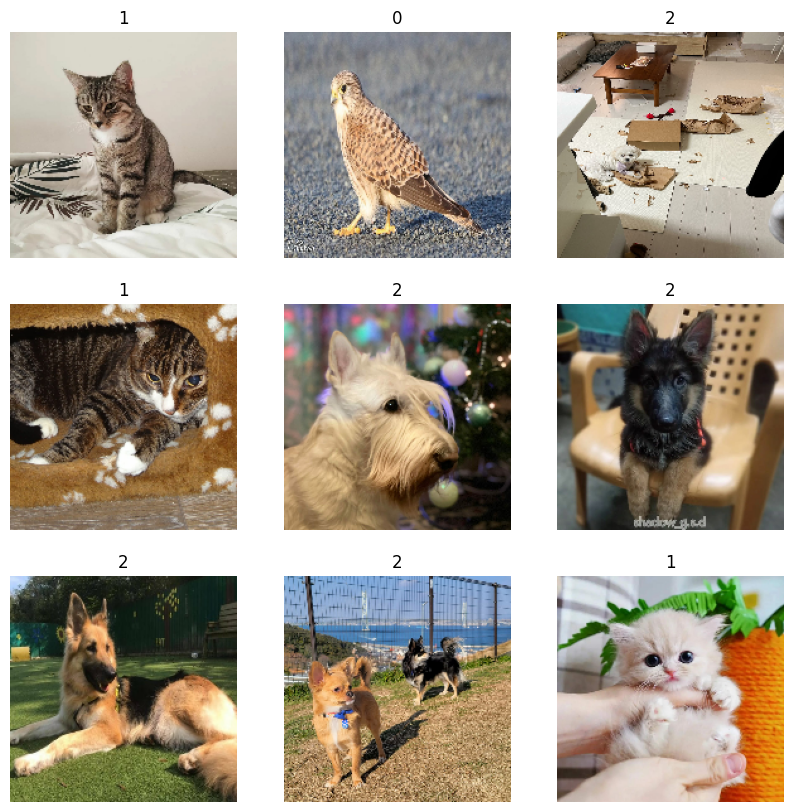

In [ ]:
#Ê™¢Ë¶ñÂúñÁâáÈõÜÂÖßÂÆπ

import matplotlib.pyplot as plt

#Ê™¢Ë¶ñÂúñÁâáÂ§ßÂ∞è
plt.figure(figsize=(10, 10))

#a batch_size of images
for images, labels in train_ds.take(1):
    #Ê™¢Ë¶ñ9ÂºµÂúñÁâá
    for i in range(9):
        #ÂúñÁâáÂëàÁèæ‰ª•3x3ÁöÑÊñπÂºè
        ax = plt.subplot(3, 3, i + 1)
        #ËΩâÊèõÁÇ∫uint8Áî®ÊñºÂëàÁèæÂúñÁâá
        plt.imshow(images[i].numpy().astype("uint8"))
        #ÊâìÂç∞ÂúñÁâáÁ®ÆÈ°ûÁ∑®ËôüÊñºÂúñÁâá‰∏äÊñπÔºå
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
from keras.applications.vgg16 import VGG16
import keras.utils as image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [ ]:
#ÂΩ±ÂÉèË≥áÊñôÂ¢ûË£ú(data_augmentation)ÔºåÂ¢ûÂä†ÂúñÁâáÁöÑË±êÂØåÂ∫¶
#KerasÊîØÊè¥ÂûÇÁõ¥ÁøªËΩâ(horizontal_and_vertical)„ÄÅÂÅè‰∏ä/‰∏ã(height_shift_range)
#ÂÅèÂ∑¶/Âè≥(width_shift_range)„ÄÅÊîæÂ§ß/Á∏ÆÂ∞è(zoom_range)„ÄÅÊòé‰∫ÆÂ∫¶Ë™øÊï¥(brightness_range)

data_augmentation = keras.Sequential(
    [
        #Êé°Áî®Ê∞¥Âπ≥/ÂûÇÁõ¥
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.1),
    ]
)

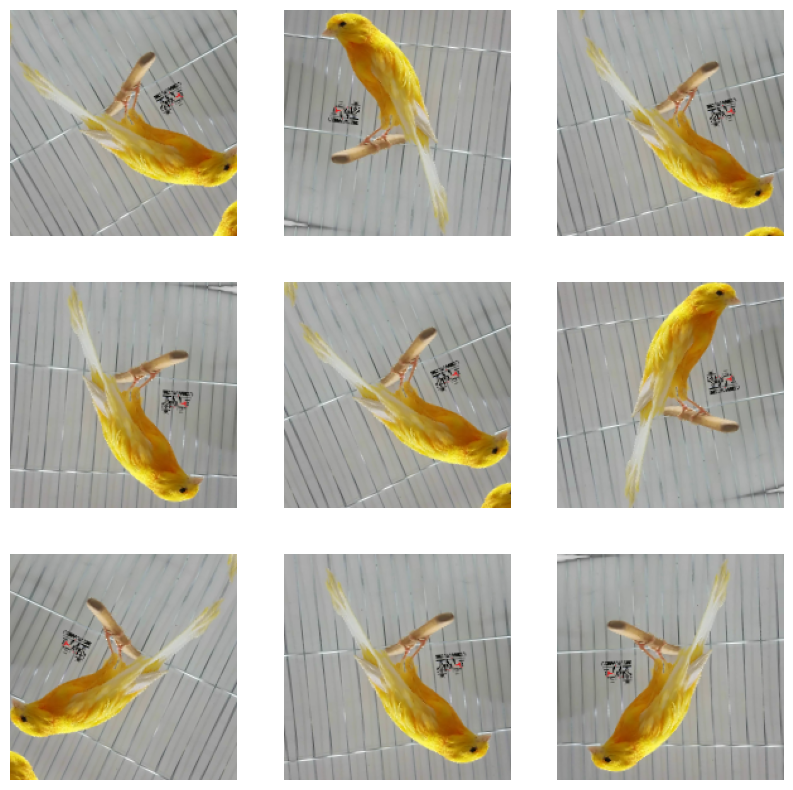

In [ ]:
#Ê™¢Ë¶ñÂΩ±ÂÉèË≥áÊñôÂ¢ûË£ú

#Ê™¢Ë¶ñÂúñÁâáÂ§ßÂ∞è
plt.figure(figsize=(10, 10))

#a batch_size of images
for images, _ in train_ds.take(1):
    #Ê™¢Ë¶ñ9ÂºµÂúñÁâá
    for i in range(9):
        #Êé°ÂèñÂΩ±ÂÉèË≥áÊñôÂ¢ûË£ú
        augmented_images = data_augmentation(images)
        #ÂúñÁâáÂëàÁèæ‰ª•3x3ÁöÑÊñπÂºè
        ax = plt.subplot(3, 3, i + 1)
        #ËΩâÊèõÁÇ∫uint8Áî®ÊñºÂëàÁèæÂúñÁâá
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

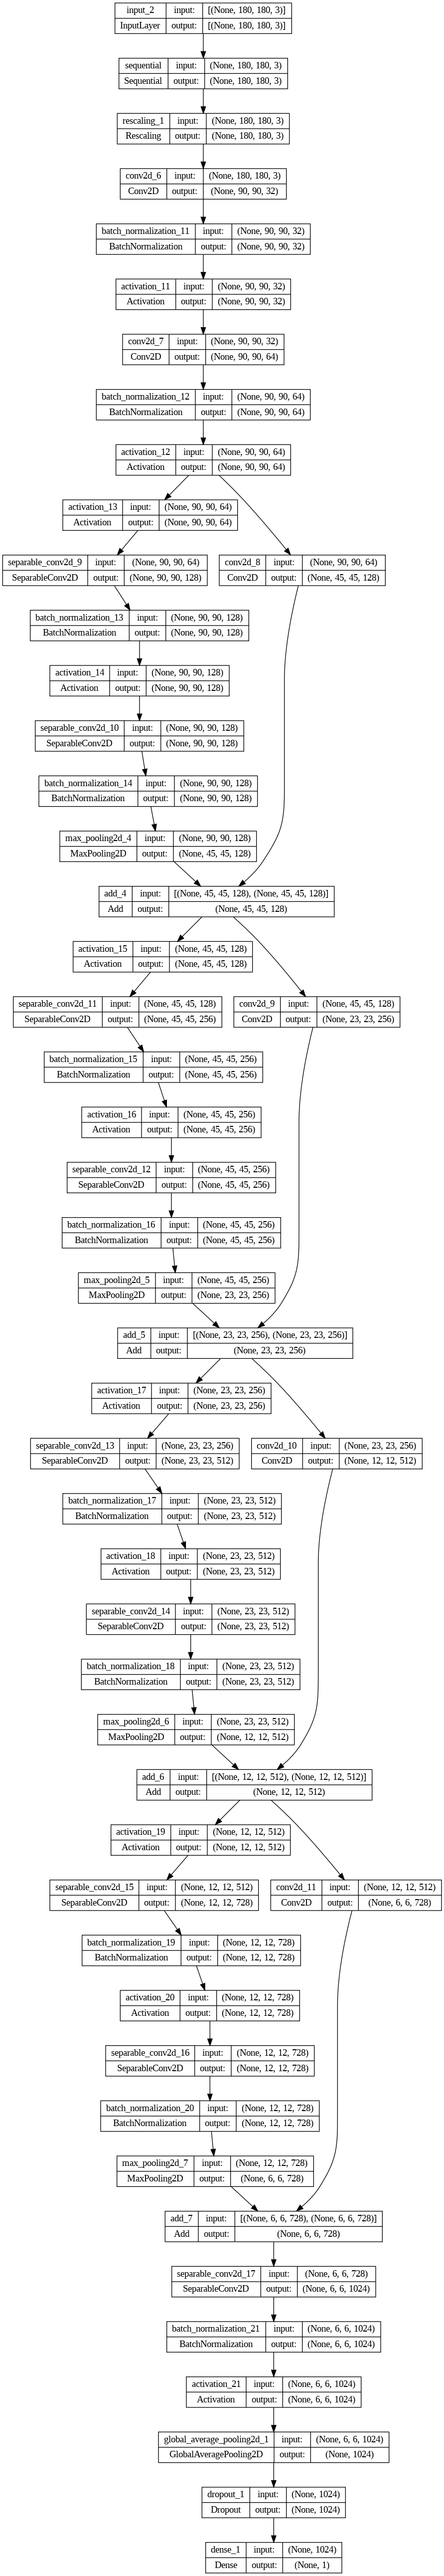

In [ ]:
#ÂÆöÁæ©ÂúñÁâáÂàÜÈ°ûÊ®°ÂûãÂª∫ÁΩÆÂáΩÊï∏

#input_shape: Ëº∏ÂÖ•ÂúñÁâáÁöÑÂ§ßÂ∞è(Ëã•ÁÇ∫ÂΩ©Ëâ≤ÈúÄÂ¢ûÂä†‰∏ÄÂÄãÁ∂≠Â∫¶ÁÇ∫3ÔºåÂõ†ÁÇ∫RGBÂÖ±3ÂÄã)
#num_classes: ÂúñÁâáÁ®ÆÈ°ûÊï∏Èáè
def make_model(input_shape, num_classes):
    #‰æãÂ¶Çinput_shapeËº∏ÂÖ•ÁÇ∫ (180,180,3)
    inputs = keras.Input(shape=input_shape)
    
    #ÂΩ±ÂÉèË≥áÊñôÂ¢ûË£ú
    x = data_augmentation(inputs)

    # Entry block
    #Ëº∏ÂÖ•ÁöÑÊØè‰∏ÄÂÄãÂÉèÁ¥†ÁÇ∫0~255ÔºåÈô§‰ª•255Ë°®Á§∫Ê≠£Ë¶èÂåñÔºåÊúÄÁµÇËº∏Âá∫ÂÄºÁÇ∫0~1
    x = layers.Rescaling(1.0 / 255)(x)

    #filters:32
    #kernal_size:3
    #padding: valid or same, valid means no padding, same means padding with zeros

    #Âª∫Á´ã‰∏ÄÂ±§Êç≤Á©çÂ±§(Conv2D)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    #Ëº∏ÂÖ•ÂúñÁâáÊï∏ÊìöÊôÇÔºåÂÖàÂ∞áÁâπÂæµÂÄºÈÄ≤Ë°åÂÅönormalizeÂæåÂÜçÈÄ≤Ë°åË®ìÁ∑¥ÔºåÂèØ‰ª•Âä†ÈÄüÊ®°ÂûãÊî∂ÊñÇ
    #Batch NormalizationÂ∞±ÊòØÊØè‰∏ÄÂ±§Ëº∏ÂÖ•ÈÉΩÂÅö‰∏ÄÊ¨°normalize
    x = layers.BatchNormalization()(x)
    #ÂÆöÁæ©ÊøÄÊ¥ªÂáΩÊï∏ÁÇ∫relu
    x = layers.Activation("relu")(x)

    #Âª∫Á´ã‰∏ÄÂ±§Êç≤Á©çÂ±§(Conv2D)
    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    #‰øùÂ≠òÁõÆÂâçÁöÑx
    previous_block_activation = x  

    #ÈáùÂ∞ç‰∏çÂêåÁöÑsizeÂª∫Á´ãÂç∑Á©çÂ±§
    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        #SeparableConv2D: Âª∫Á´ãÂèØÂàÜÈõ¢ÁöÑÂç∑Á©çÂ±§
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        #SeparableConv2D: ÂÜçÂª∫Á´ãÂèØÂàÜÈõ¢ÁöÑÂç∑Á©çÂ±§
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        #pool_size:3 (3X3) pool window
        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        #Âª∫Á´ã‰∏ÄÂ±§Êç≤Á©çÂ±§(Conv2D)Ôºå‰ª•‰πãÂâç‰øùÁïôÁöÑx‰ΩúÁÇ∫Ëº∏ÂÖ•ÂÄº
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  #ÁµêÂêàÂèØÂàÜÈõ¢ÁöÑÂç∑Á©çÂ±§
        previous_block_activation = x  #ÂÜçÂ∞áÁµêÂêàÂæåÁöÑx‰ΩúÁÇ∫Ëº∏ÂÖ•ÂÄº

    #Á∂ìÈÅéÂèØÂàÜÈõ¢Âç∑Á©çÂ±§ÂæåÔºåÂÜçÁç®Á´ãÂª∫Á´ãsizeÁÇ∫1024ÁöÑÂàÜÈõ¢Âç∑Á©çÂ±§Ôºå
    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    #ÈÄ≤Ë°åÊúÄÁµÇÁöÑPooling
    x = layers.GlobalAveragePooling2D()(x)

    #Á®ÆÈ°ûÁÇ∫2Á®ÆÔºåÂàÜÂà•ÊòØCatËàáDog
    if num_classes == 2:
        #‰∫åÂÖÉÂàÜÈ°ûÊé°ÂèñsigmoidÂç≥ÂèØ
        activation = "sigmoid"
        units = 1
    else:
        #for multi-classes classification last layer use softmax
        activation = "softmax"
        units = num_classes

    #50%ÁöÑÊ¨äÈáç‰ΩéÁöÑÁ•ûÁ∂ìÂÖÉÂ∞áË¢´Ê∂àÊªÖ
    x = layers.Dropout(0.5)(x)

    #Dense: Ë°®Á§∫Âª∫Á´ã‰∏ÄÂÄãfull-connectedÁöÑÈ°ûÁ•ûÁ∂ìÁ∂≤Ë∑Ø
    #units: Positive integer, dimensionality of the output space.
    outputs = layers.Dense(units, activation=activation)(x)
       
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
#ÂàùÂßãÂåñË®≠ÂÆö
epochs = 10

#ÂÑ≤Â≠òÊ®°ÂûãÂèÉÊï∏Ê™îÊ°àÔºåÊØè‰∏ÄÊ¨°epochÈÉΩÊúÉÁî¢Áîü‰∏ÄÂÄãÂèÉÊï∏Ê™îÊ°à
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]

#Ê®°ÂûãÁ∑®Ë≠Ø
model.compile(
    #Â≠∏ÁøíÁéá(learning_rate)Ë®≠ÂÆöÁÇ∫0.001
    optimizer=keras.optimizers.Adam(0.001),
    #‰∫åÂÖÉÂúñÁâáÂàÜÈ°ûÊé°Áî®
    #loss="binary_crossentropy",
    #Èùû‰∫åÂÖÉÂúñÁâáÂàÜÈ°ûÊé°Áî®‰∏ãÂàóÊñπÂºè
    loss="categorical_crossentropy",
    #loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds
)

Epoch 1/10
334/334 [==============================] - 2441s 7s/step - loss: 0.0000e+00 - accuracy: 0.4828 - val_loss: 0.0000e+00 - val_accuracy: 0.4149
Epoch 2/10
334/334 [==============================] - 2445s 7s/step - loss: 0.0000e+00 - accuracy: 0.4855 - val_loss: 0.0000e+00 - val_accuracy: 0.3786
Epoch 3/10
334/334 [==============================] - 2450s 7s/step - loss: 0.0000e+00 - accuracy: 0.4838 - val_loss: 0.0000e+00 - val_accuracy: 0.3396
Epoch 4/10
334/334 [==============================] - 2429s 7s/step - loss: 0.0000e+00 - accuracy: 0.4869 - val_loss: 0.0000e+00 - val_accuracy: 0.4374
Epoch 5/10
334/334 [==============================] - 2462s 7s/step - loss: 0.0000e+00 - accuracy: 0.4898 - val_loss: 0.0000e+00 - val_accuracy: 0.3906
Epoch 6/10
334/334 [==============================] - 2466s 7s/step - loss: 0.0000e+00 - accuracy: 0.4877 - val_loss: 0.0000e+00 - val_accuracy: 0.3861
Epoch 7/10
334/334 [==============================] - 2469s 7s/step - loss: 0.0000e+00 -

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


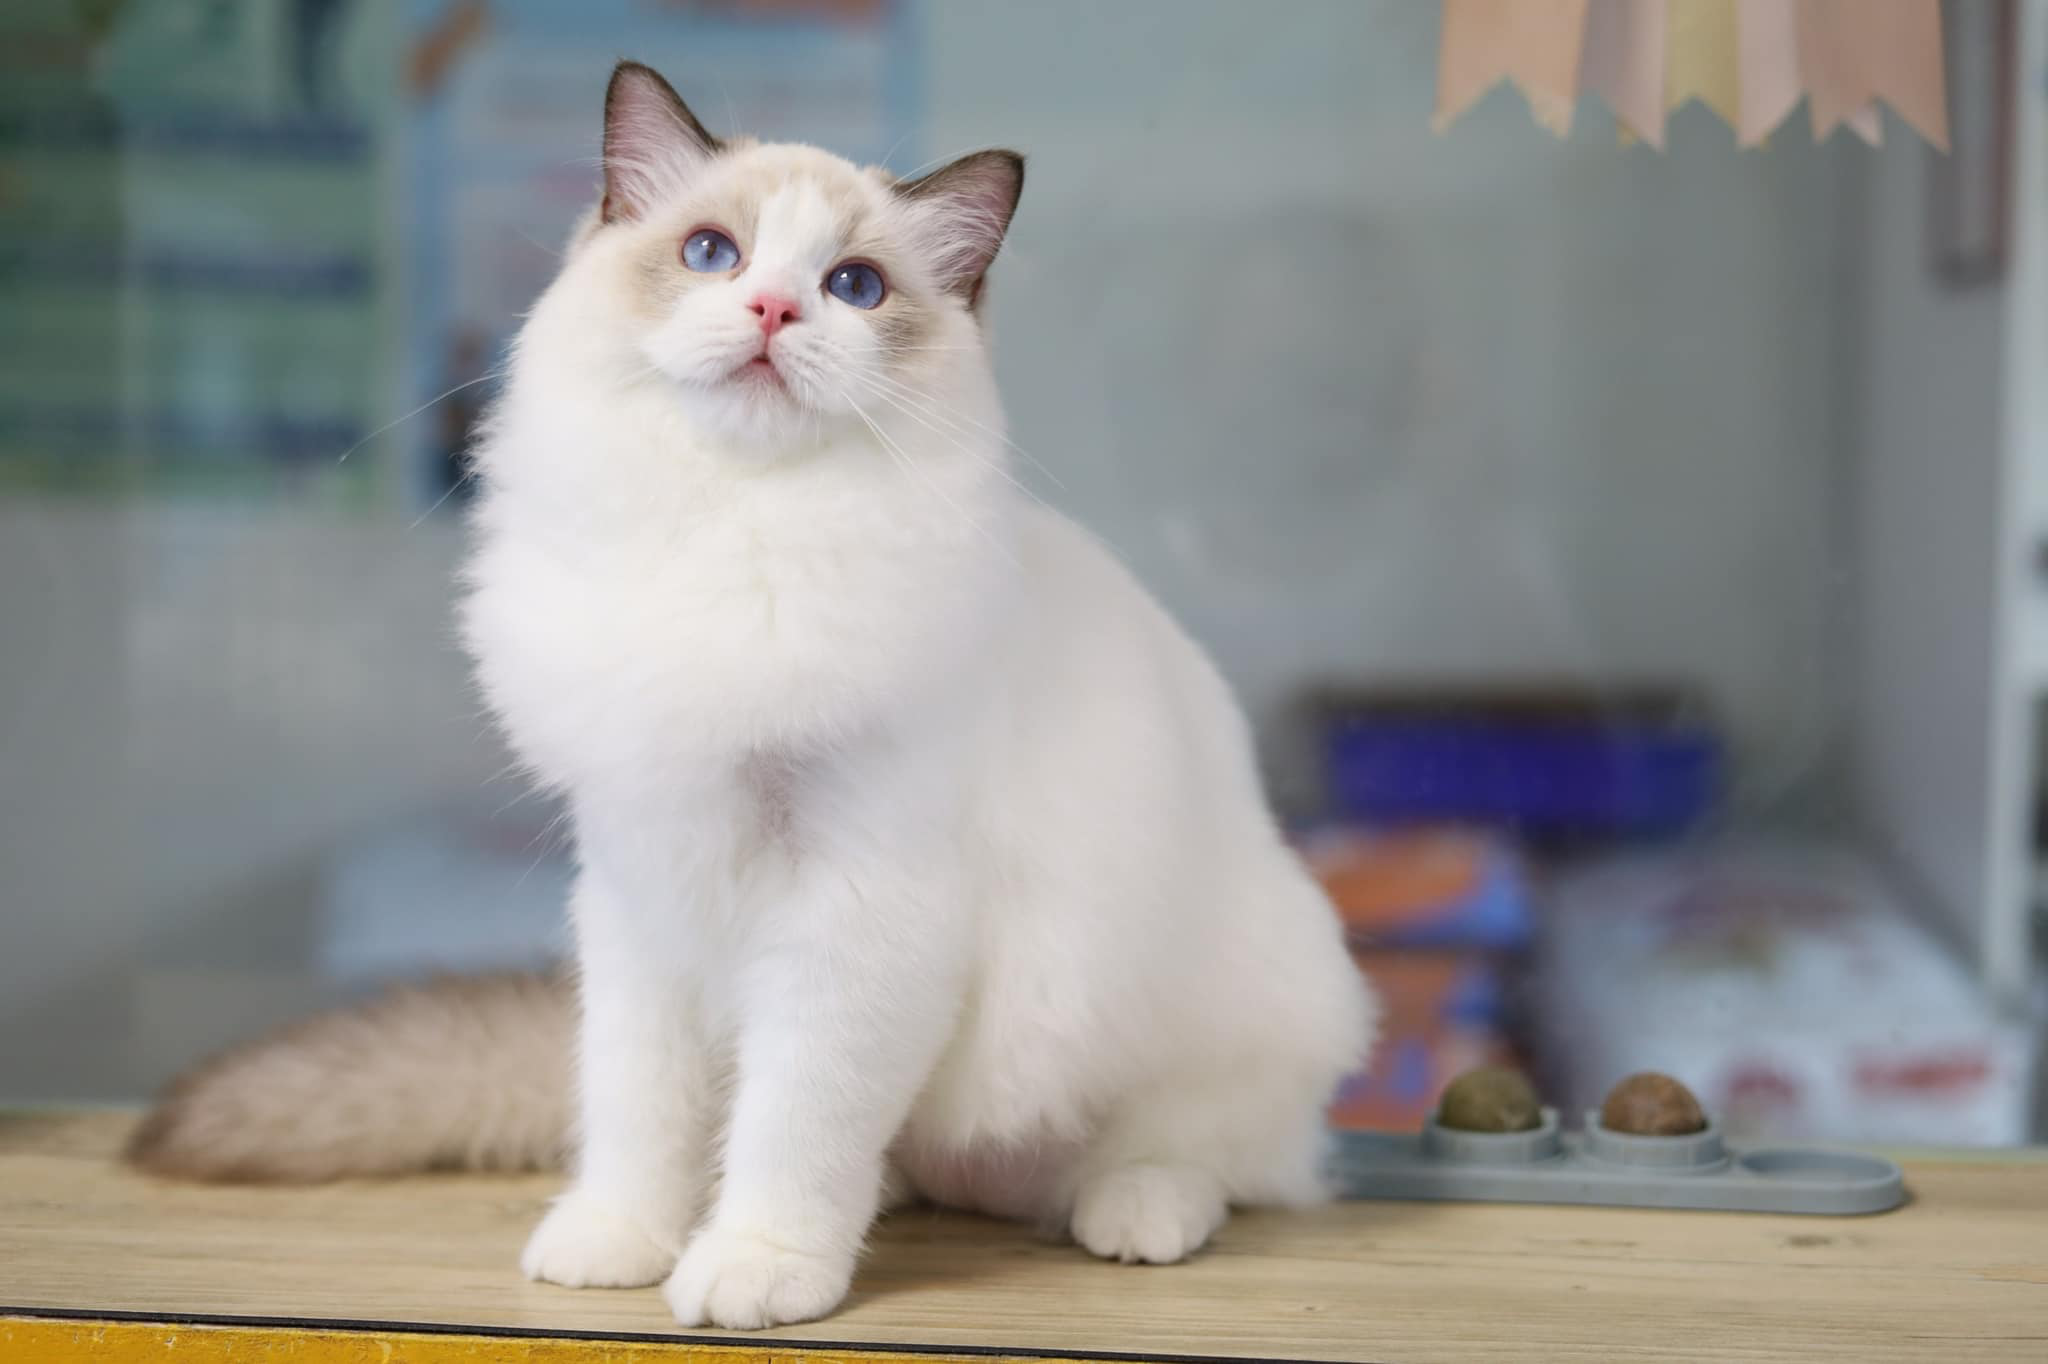

1/1 [==============================] - 0s 81ms/step
This image is 100.00 percent cat and 0.00 percent dog.


In [ ]:
#Run inference on new data
from google.colab import drive
from PIL import Image
drive.mount('/content/gdrive') # Ê≠§ËôïÈúÄË¶ÅÁôªÂÖ•googleÂ∏≥Ëôü
img=Image.open('/content/gdrive/MyDrive/Colab Notebooks/MyPet/cat1.jpg')
img.show()
img = keras.preprocessing.image.load_img(
    #Âª∫Á´ãCat1ÁõÆÈåÑÔºå‰∏¶‰∏äÂÇ≥‰∏ÄÂºµÊñ∞ÁöÑË≤ìÂí™ÁöÑÂúñÁâáÔºåÂèñÂêçÁÇ∫my_cat.jpg
    "/content/gdrive/MyDrive/Colab Notebooks/MyPet/cat1.jpg", target_size=image_size
)
#img_to_array:‰∏äÂÇ≥ÁöÑÊñ∞ÂúñÁâáÈúÄË¶ÅËΩâÊèõÁÇ∫numpyÊ†ºÂºè
img_array = keras.preprocessing.image.img_to_array(img)
#expand_dims: ÁÇ∫Á¨¶ÂêàÂúñÁâáË¶ÅÊ±ÇÔºånumpyÊ†ºÂºèÁöÑÊñ∞ÂúñÁâáÈúÄË¶ÅÊì¥ÂÖÖ‰∏ÄÂÄãÁ∂≠Â∫¶
img_array = tf.expand_dims(img_array, 0) 

#inferenceÂúñÁâáÁ®ÆÈ°û
predictions = model.predict(img_array)

score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

In [ ]:
#ÂÑ≤Â≠òÊ®°ÂûãÁõÆÈåÑÁÇ∫my_model
#my_modelÁõÆÈåÑÂèØ‰ª•ÂÇô‰ªΩÂõûgoogle driveÔºå‰ª•‰æøÂæåÁ∫å‰ΩøÁî®

model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
#ÂÅáË®≠Êñ∞Èñã‰∏ÄÂÄãcolabÔºåÂèØ‰ª•Â∞áÂÖàÂâçÂ≠òÂú®google driveÁöÑÊ®°ÂûãÊ™îÊ°à my_modelÊãâÈÅé‰æÜ
#ËÆÄÂèñ my_model Ê®°ÂûãÊ™îÊ°à

new_model = tf.keras.models.load_model('my_model')

#Ê™¢Ë¶ñÊ®°ÂûãÁµêÊßã
#Ê≥®ÊÑèËßÄÂØüÊ®°ÂûãÂèÉÊï∏Êï∏Èáè: 2,782,649
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 180, 180, 3)  0           ['input_2[0][0]']                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 180, 180, 3)  0           ['sequential[0][0]']             
                                                                                                  
 conv2d_6 (Conv2D)              (None, 90, 90, 32)   896         ['rescaling_1[0][0]']      

In [ ]:
#Â¶ÇÊûú‰∏çÊÉ≥Â≠òÊï¥ÂÄãÁõÆÈåÑÔºå‰πüÂèØ‰ª•Â≠òÊ®°ÂûãÊ™îÊ°à
model.save('my_model.h5')
#ËÆÄÂèñÊ®°ÂûãÊ™îÊ°à
new_model1 = tf.keras.models.load_model('my_model.h5')

In [ ]:
#check its architecture
new_model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 180, 180, 3)  0           ['input_2[0][0]']                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 180, 180, 3)  0           ['sequential[0][0]']             
                                                                                                  
 conv2d_6 (Conv2D)              (None, 90, 90, 32)   896         ['rescaling_1[0][0]']      

In [ ]:
#ÂÜçÊ¨°inferenceË≤ìÂí™ÂúñÁâáÔºåÁúãÁúãÁµêÊûúÊúâÊ≤íÊúâÂ∑ÆÂà•
img = keras.preprocessing.image.load_img(
    "/content/gdrive/MyDrive/Colab Notebooks/MyPet/cat1.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = new_model1.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

1/1 [==============================] - 0s 311ms/step
This image is 100.00 percent cat and 0.00 percent dog.
